In [1]:
# 1. Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load the data 
cereal = pd.read_csv("Diet.csv")

#3. Display the first 5 row data
display(cereal.head())

#4. Display the last 5 row data
display(cereal.tail())

,Person,gender,Age,Height,Before Weight,Diet,After Weight
0,37,0,16.0,165,68,2,63.8
1,31,0,20.0,169,62,2,55.0
2,57,0,20.0,169,67,3,61.6
3,54,1,21.0,159,64,3,60.6
4,1,0,22.0,159,58,1,54.2


,Person,gender,Age,Height,Before Weight,Diet,After Weight
73,43,1,54.0,196,75,2,69.2
74,3,0,55.0,170,64,1,63.3
75,64,0,56.0,171,73,3,68.9
76,60,0,58.0,141,70,3,63.0
77,11,0,60.0,173,72,1,70.5


In [2]:
# 1. Number of rows and columns
print("--- Rows and Columns ---")
print(cereal.shape)

# 2. Data types of each column
print("\n--- Data Types ---")
print(cereal.dtypes)

# 3. Number of missing values per column
print("\n--- Missing Values ---")
print(cereal.isnull().sum())


--- Rows and Columns ---
(78, 7)

--- Data Types ---
Person             int64
gender             int64
Age              float64
Height             int64
Before Weight      int64
Diet               int64
After Weight     float64
dtype: object

--- Missing Values ---
Person           0
gender           0
Age              3
Height           0
Before Weight    0
Diet             0
After Weight     0
dtype: int64


# Homework 1: Diet Data Report

## 1. Dataset Overview
* **Number of Rows:** 78
* **Number of Columns:** 7

## 2. Data Types
* **Integers (int64):** Person, gender, Height, Before Weight, Diet
* **Decimals (float64):** Age, After Weight

## 3. Missing Values
* **Age:** 3 missing values
* **All other columns:** No missing values

## 4. Answers to Questions
* **How many observations are in the dataset?** 78
* **Are there any missing values?** Yes, there are 3 missing values in the `Age` column.

In [3]:
# 1. Rename all column names
# This takes the current names, makes them lowercase, and replaces spaces with underscores
cereal.columns = cereal.columns.str.lower().str.replace(' ', '_')

# 2. Display the updated column names
print("--- Updated Column Names ---")
print(cereal.columns)

# Display the first few rows to see the change in the table
display(cereal.head())

--- Updated Column Names ---
Index(['person', 'gender', 'age', 'height', 'before_weight', 'diet',
       'after_weight'],
      dtype='str')


,person,gender,age,height,before_weight,diet,after_weight
0,37,0,16.0,165,68,2,63.8
1,31,0,20.0,169,62,2,55.0
2,57,0,20.0,169,67,3,61.6
3,54,1,21.0,159,64,3,60.6
4,1,0,22.0,159,58,1,54.2


Question: Why is it useful to avoid spaces in column names?

Answer:

Easier Coding (Dot Notation): If a column has no spaces (e.g., before_weight), you can select it quickly using cereal.before_weight. If it has spaces, you are forced to type the longer version: cereal['Before Weight'].

Avoids Errors: Spaces can be tricky. Sometimes you might accidentally type two spaces instead of one, which causes "Column Not Found" errors. Underscores are clear and visible.

Compatibility: Many other data tools (like SQL databases) and plotting libraries prefer names without spaces. Using underscores ensures your data works everywhere.

In [4]:
# 1. Compute summary statistics (Mean, Min, Max)
# We select the specific columns first, then ask for specific stats
stats = cereal[['age', 'height', 'before_weight', 'after_weight']].agg(['mean', 'min', 'max'])

print("--- Summary Statistics ---")
display(stats)

# 2. Calculate average weight by diet group
# We group by 'diet', select the weight columns, and calculate the mean
diet_group_avg = cereal.groupby('diet')[['before_weight', 'after_weight']].mean()

print("\n--- Average Weights by Diet Group ---")
display(diet_group_avg)

--- Summary Statistics ---


,age,height,before_weight,after_weight
mean,39.36,170.820513,72.525641,68.680769
min,16.00,141.000000,58.000000,53.000000
max,60.00,201.000000,103.000000,103.000000



--- Average Weights by Diet Group ---


,before_weight,after_weight
diet,,
1,72.875000,69.575000
2,71.111111,68.085185
3,73.629630,68.481481


### Answers to Part 4 Questions

1. **Which diet group has the lowest average after weight?**
   * Diet Group 2 has the lowest average after weight (approx 68.08).

2. **Do all diet groups show weight reduction?**
   * Yes, all three diet groups show a decrease from their 'before_weight' to their 'after_weight'.

In [5]:
# 1. Create the new variable 'weight_change'
# Formula: After Weight - Before Weight
# (Note: If they lost weight, this number will be negative!)
cereal['weight_change'] = cereal['after_weight'] - cereal['before_weight']

# 2. Display the first 10 rows to check the new column
print("--- First 10 Rows with Weight Change ---")
display(cereal.head(10))

# 3. Compute the mean weight change for each diet group
diet_loss = cereal.groupby('diet')['weight_change'].mean()

print("\n--- Average Weight Change by Group ---")
display(diet_loss)

--- First 10 Rows with Weight Change ---


,person,gender,age,height,before_weight,diet,after_weight,weight_change
0,37,0,16.0,165,68,2,63.8,-4.2
1,31,0,20.0,169,62,2,55.0,-7.0
2,57,0,20.0,169,67,3,61.6,-5.4
3,54,1,21.0,159,64,3,60.6,-3.4
4,1,0,22.0,159,58,1,54.2,-3.8
5,55,0,22.0,169,65,3,58.2,-6.8
6,20,1,25.0,165,80,1,77.6,-2.4
7,72,1,26.0,179,78,3,69.4,-8.6
8,8,0,28.0,176,69,1,60.5,-8.5
9,9,0,28.0,165,70,1,68.1,-1.9



--- Average Weight Change by Group ---


diet
1   -3.300000
2   -3.025926
3   -5.148148
Name: weight_change, dtype: float64


* **Which diet group shows the greatest average weight loss?**
  * Diet Group 3 shows the greatest weight loss because it has the most negative average change.

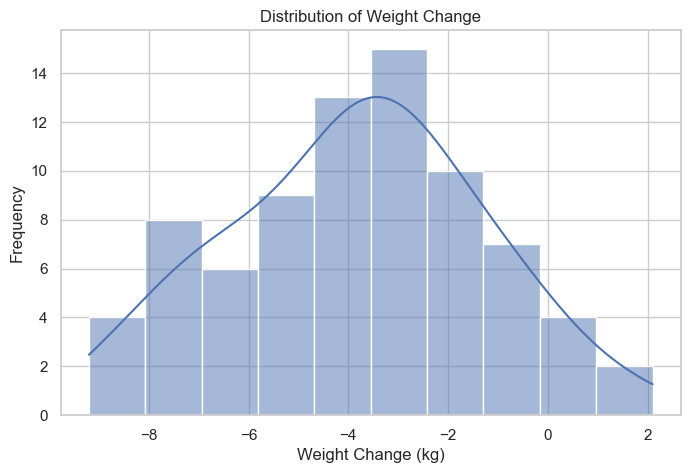

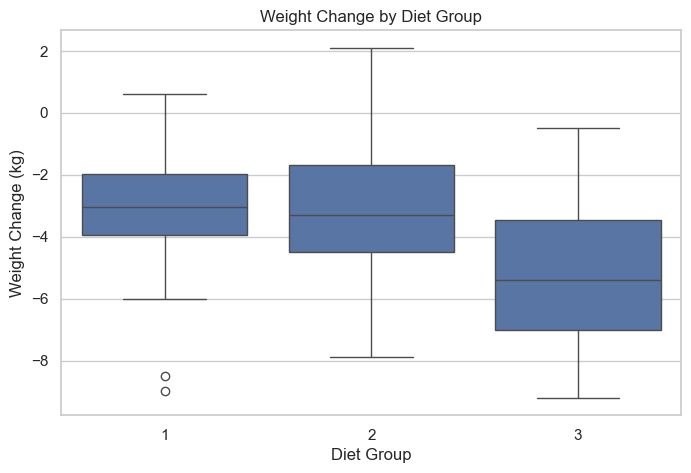

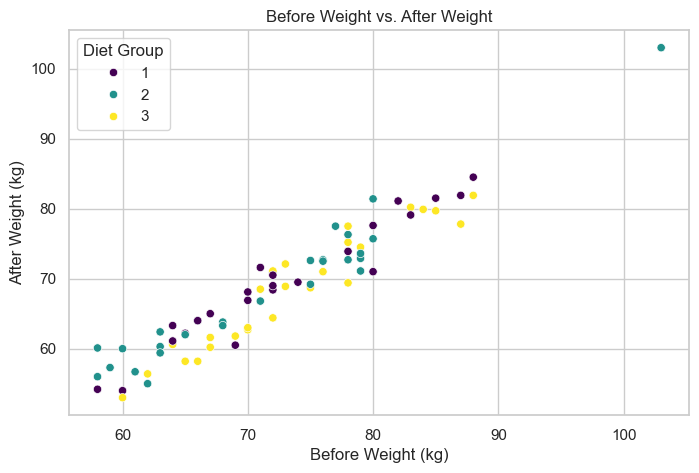

In [6]:
# Set the visual style to make plots look nice
sns.set_theme(style="whitegrid")

# --- PLOT 1: Histogram of Weight Change ---
plt.figure(figsize=(8, 5))
sns.histplot(data=cereal, x='weight_change', bins=10, kde=True)
plt.title('Distribution of Weight Change')
plt.xlabel('Weight Change (kg)')
plt.ylabel('Frequency')
plt.show()

# --- PLOT 2: Boxplot of Weight Change by Diet Group ---
plt.figure(figsize=(8, 5))
sns.boxplot(data=cereal, x='diet', y='weight_change')
plt.title('Weight Change by Diet Group')
plt.xlabel('Diet Group')
plt.ylabel('Weight Change (kg)')
plt.show()

# --- PLOT 3: Scatter Plot of Before vs After Weight ---
plt.figure(figsize=(8, 5))
sns.scatterplot(data=cereal, x='before_weight', y='after_weight', hue='diet', palette='viridis')
plt.title('Before Weight vs. After Weight')
plt.xlabel('Before Weight (kg)')
plt.ylabel('After Weight (kg)')
plt.legend(title='Diet Group')
plt.show()

### Answer to Part 6
* **Which plot best shows differences between diet groups?**
  * The **Boxplot** best shows the differences.
  * **Reason:** It visually separates the data into the three specific diet groups side-by-side. This makes it easy to compare the central tendency (median weight loss) and the spread (variance) of each group directly.